In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#from feature_engine.outliers import Winsorizer
import matplotlib.pyplot as plt
from scipy import stats


from sklearn.tree import DecisionTreeClassifier as DT

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split



In [3]:
dia=pd.read_csv("Diabetes.csv")

In [5]:
dia

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,NO
764,2,122,70,27,0,36.8,0.340,27,NO
765,5,121,72,23,112,26.2,0.245,30,NO
766,1,126,60,0,0,30.1,0.349,47,YES


In [7]:
dia.info()

#######################################################


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Number of times pregnant      768 non-null    int64  
 1    Plasma glucose concentration  768 non-null    int64  
 2    Diastolic blood pressure      768 non-null    int64  
 3    Triceps skin fold thickness   768 non-null    int64  
 4    2-Hour serum insulin          768 non-null    int64  
 5    Body mass index               768 non-null    float64
 6    Diabetes pedigree function    768 non-null    float64
 7    Age (years)                   768 non-null    int64  
 8    Class variable                768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [9]:
dia.describe()


,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [11]:
dia.columns=["Pregencies","Glucose",
             "BloodPressure","SkinThickness",
             "Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]

In [13]:
dia.isna().sum()

Pregencies                  0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

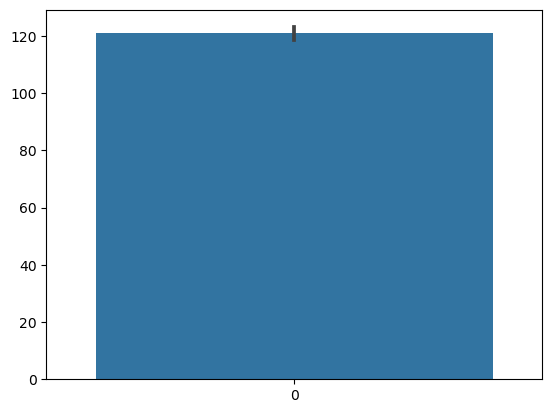

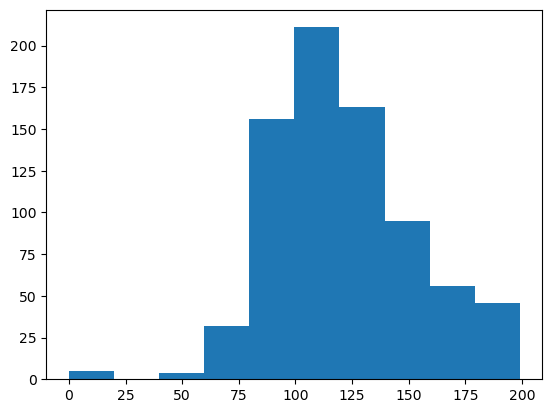

In [17]:
########################## Univariate analysis #############################################

def univarite_analysis(data):
    sns.barplot(data)
    plt.show()
    plt.hist(data)
    plt.show()

univarite_analysis(dia["Glucose"])

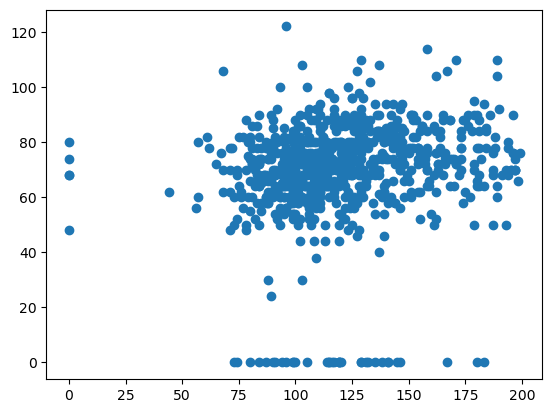

In [19]:
############################## Bivariate analysis ##########################################
def bivariate_analysis(x,y):
    plt.scatter(x,y)
    plt.show()

bivariate_analysis(dia["Glucose"], dia["BloodPressure"])

In [23]:
#################################################################################################
########################## Data preprocessing #########################################
def check_outliers(data):
    q1=data.quantile(0.25)
    q2=data.quantile(0.50)
    q3=data.quantile(0.75)
    print(q1)
    print(q2)
    print(q3)
    IQR=q3-q1
    print(IQR)
    lower_limit=q1-1.5*IQR
    upper_limit=q3+1.5*IQR
    outlier=[]
    for x in data:
        if (x<lower_limit) or ((x>upper_limit)):
            outlier.append(x)
    print('outlier is ',outlier)

In [25]:
def plot_outlier(data):
    sns.boxplot(data);plt.title("new box plot");plt.show();

In [27]:
def winsorizer(method,fold,tail_p,var,data):
    winsorizer=Winsorizer(capping_method=method,fold=fold,tail=tail_p,variables=[var])
    trans=winsorizer.fit_transform(data)
    print(winsorizer.left_tail_caps_,winsorizer.right_tail_caps_)
    return (trans)

99.0
117.0
140.25
41.25
outlier is  [0, 0, 0, 0, 0]


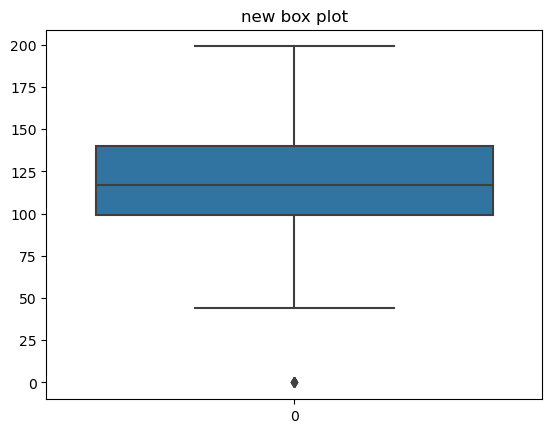

62.0
72.0
80.0
18.0
outlier is  [0, 0, 30, 110, 0, 0, 0, 0, 108, 122, 30, 0, 110, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 24, 0, 0, 0, 0, 114, 0, 0, 0]


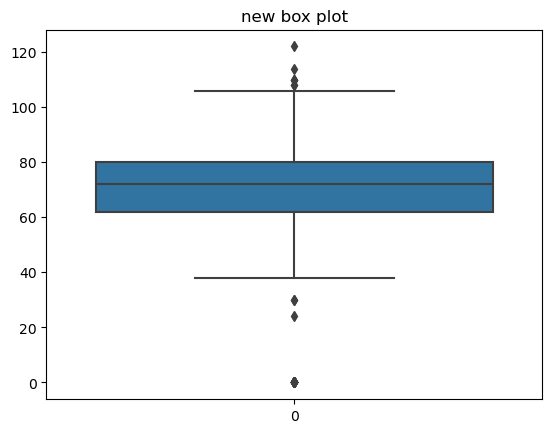

0.0
23.0
32.0
32.0
outlier is  [99]


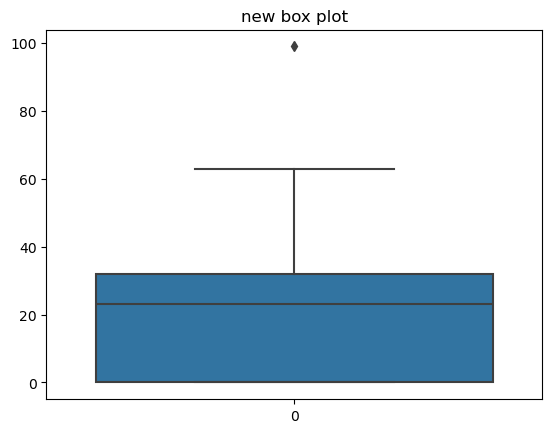

0.0
30.5
127.25
127.25
outlier is  [543, 846, 342, 495, 325, 485, 495, 478, 744, 370, 680, 402, 375, 545, 360, 325, 465, 325, 415, 579, 474, 328, 480, 326, 330, 600, 321, 440, 540, 480, 335, 387, 392, 510]


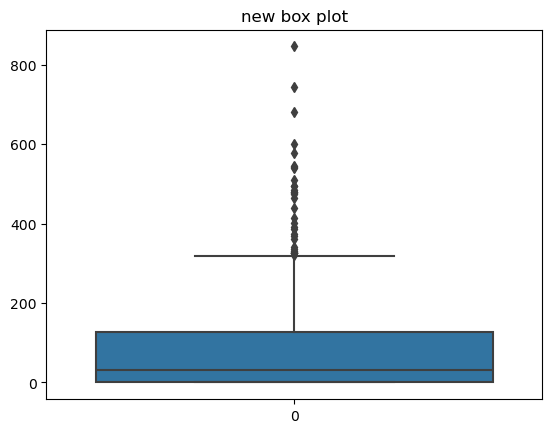

27.3
32.0
36.6
9.3
outlier is  [0.0, 0.0, 0.0, 0.0, 53.2, 55.0, 0.0, 67.1, 52.3, 52.3, 52.9, 0.0, 0.0, 59.4, 0.0, 0.0, 57.3, 0.0, 0.0]


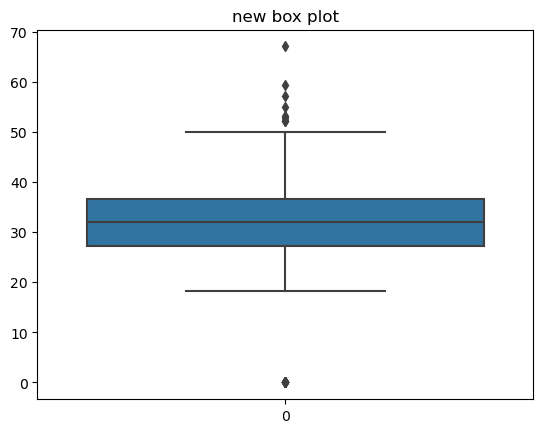

0.24375
0.3725
0.62625
0.38249999999999995
outlier is  [2.288, 1.441, 1.39, 1.893, 1.781, 1.222, 1.4, 1.321, 1.224, 2.329, 1.318, 1.213, 1.353, 1.224, 1.391, 1.476, 2.137, 1.731, 1.268, 1.6, 2.42, 1.251, 1.699, 1.258, 1.282, 1.698, 1.461, 1.292, 1.394]


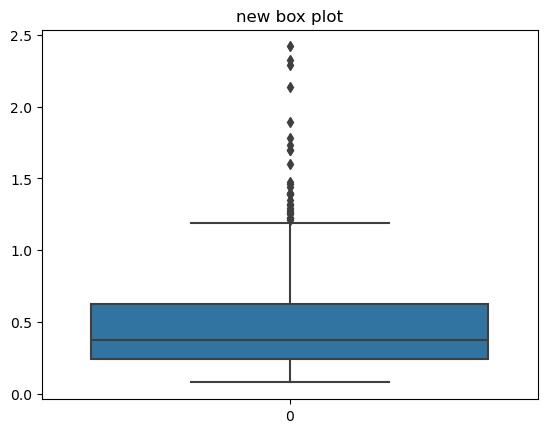

In [31]:
cols=["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction"]
for i in cols:
    check_outliers(dia[i])
    plot_outlier(dia[i])
    
#for i in cols:
    #dia[i]=winsorizer("iqr", 1.5, "both", i, dia[[i]])

In [33]:
##########################################################################################
################################### EDA #################################################

def EDA(data):
    print("Mean is: ")
    print(data.mean())
    
    print("Median is: ")
    print(data.median())
    print("Mode is: ")
    print(stats.mode(data))
    
    #second moment bussiness decision
    print("variance is: ")
    print(data.var())
    print("Standard deviation is: ")
    print(data.std())
    print("Range is: ")
    print(data.max()-data.min())
    
    #third moment bussiness decision
    print("Skewness is: ")
    print(data.skew())
    
    #fourth business moment
    print("Kurtosis is: ")
    print(data.kurt())

EDA(dia.iloc[:,0:7])

Mean is: 
Pregencies                    3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
dtype: float64
Median is: 
Pregencies                    3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
dtype: float64
Mode is: 
ModeResult(mode=array([ 1.   , 99.   , 70.   ,  0.   ,  0.   , 32.   ,  0.254]), count=array([135.,  17.,  57., 227., 374.,  13.,   6.]))
variance is: 
Pregencies                     11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
Diabetes

In [35]:
def scaling(data,s_type):
    if s_type=="stand":
        data=(data-data.mean())/(data.std())
        return data
    elif s_type=="sc":
        sc=StandardScaler()
        return sc.fit_transform(data)
    elif s_type=="norm":
        return (data-data.min())/(data.max()-data.min())


x_norm=scaling(dia.iloc[:,0:-1],"norm")


x_sc=scaling(dia.iloc[:,0:-1],"sc")


x_stand=scaling(dia.iloc[:,0:-1],"stand")

x_norm.describe()


x_stand.describe()

y=dia.iloc[:,-1]

In [37]:

def decisionTree(x,y,t_size):
    train_X,test_X,train_Y,test_Y=train_test_split(x,y,test_size=t_size)
    dia_model=DT(criterion = 'entropy')
    dia_model.fit(train_X,train_Y)
    test_pred=dia_model.predict(test_X)
    print(pd.crosstab(test_pred,test_Y))
    print("Test Accuracy: ",np.mean(test_pred==test_Y)*100)
    print("Test Error: ",np.mean(test_pred!=test_Y)*100)
    
    train_pred=dia_model.predict(train_X)
    print("Cross tab:",pd.crosstab(train_pred,train_Y))
    print("Train Accuracy: ",np.mean(train_pred==train_Y)*100)
    print("Train Error: ",np.mean(train_pred!=train_Y)*100)
########################normalisation ##########################
decisionTree(x_norm, y, 0.2)

################## standard scaler #############################

decisionTree(x_sc, y, 0.2)    

###################### standardisation #########################

decisionTree(x_stand, y, 0.2)    


Outcome  NO  YES
row_0           
NO       84   19
YES      19   32
Test Accuracy:  75.32467532467533
Test Error:  24.675324675324674
Cross tab: Outcome   NO  YES
row_0            
NO       397    0
YES        0  217
Train Accuracy:  100.0
Train Error:  0.0
Outcome  NO  YES
row_0           
NO       69   25
YES      34   26
Test Accuracy:  61.68831168831169
Test Error:  38.311688311688314
Cross tab: Outcome   NO  YES
row_0            
NO       397    0
YES        0  217
Train Accuracy:  100.0
Train Error:  0.0
Outcome  NO  YES
row_0           
NO       73   24
YES      21   36
Test Accuracy:  70.77922077922078
Test Error:  29.22077922077922
Cross tab: Outcome   NO  YES
row_0            
NO       406    0
YES        0  208
Train Accuracy:  100.0
Train Error:  0.0
